In [40]:
import numpy as np
import os
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import sys
sys.path.append("../utils")
sys.path.append("../")
import utils.util_lookup_table
from pprint import pprint

In [67]:
[f[:-4] for f in os.listdir("./results")]
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

loss_passing QPSK_neural_and_neural 8_4
[14.599999999999913, 12.999999999999918, 11.999999999999922, 10.399999999999928, 8.399999999999935, 4.1999999999999496]


NameError: name 'lighten_color' is not defined

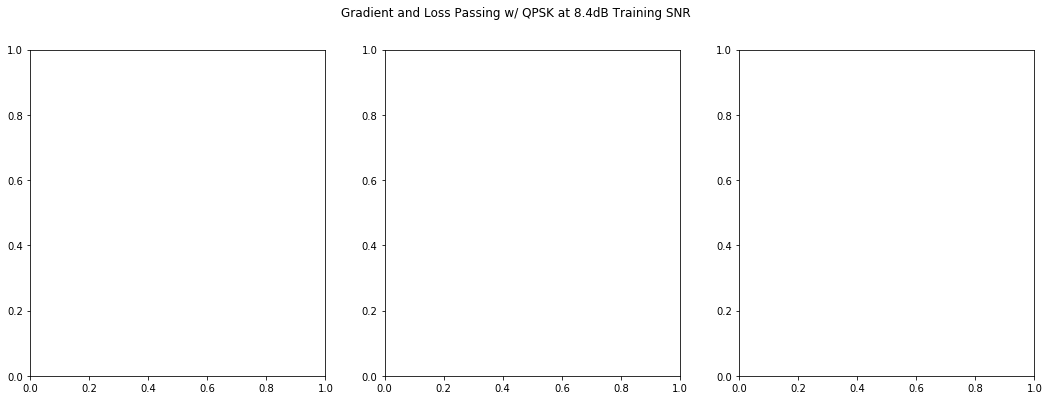

In [70]:
br = utils.util_lookup_table.BER_lookup_table()
color = {
 'QPSK_classic_and_neural':"r",
 'QPSK_neural_vs_clone':"r",
 'QPSK_neural_and_neural':"g",
 'QPSK_neural_vs_selfalien':'g',
 'QPSK_neural_and_classic':"b",
 'QPSK_neural_vs_poly':'y',
 'QPSK_neural_vs_classic':"orange",
 'QPSK_poly_vs_clone':"blue",
}

LINE_STYLES = {'private_preamble':'dashed',
               'repprivate_preamble':'dashed',
               'shared_preamble': 'solid', 
               'loss_passing': 'dashed', 
               'gradient_passing':'solid',
               'QPSK':'solid',
               '8PSK':'dashed',
               'QAM16':'dotted',
               'neural_vs_poly': (0, (7, 3)),
               'poly_vs_clone':(0, (4, 7)),
               'neural_vs_clone':'solid',#(0, (2, 7)),
               'neural_vs_selfalien':'solid',
               
              }
DARKEN_BY = {
               'neural_vs_poly':1,
               'poly_vs_clone':1,
               'neural_vs_clone':1,
               'neural_vs_selfalien':.5,
               'shared_preamble': 1,
               'private_preamble': .8,
               'loss_passing':.5,
               'gradient_passing':1.0
            }

COLORS = {
               'shared_preamble': 'g',
               'private_preamble': 'b',
               'neural_vs_poly':'purple',
               'poly_vs_clone':'r',
               'neural_vs_clone':'b',
               'neural_vs_selfalien':'b',
               'neural_and_classic': 'blue',
               'classic_and_neural':'green',
               'neural_and_neural':'orange',
               'classic_and_classic': 'grey',
            }

fig,(ber, db3, db5) = plt.subplots(1, 3)
fig.set_figheight(6)
fig.set_figwidth(6*3)
# for ax in axes:
#     ax.set_aspect('equal', adjustable="datalim")
# (ber, db3, db5) = axes
fig.suptitle('Gradient and Loss Passing w/ QPSK at 8.4dB Training SNR')
baseline=False
must_include = ['_and_', '8_4']
must_exclude = ['poly', 'selfalien']
k=0
for experiment_name in os.listdir("./results/"):
    if (not all([_ in experiment_name for _ in must_include])) \
        or any([_ in experiment_name for _ in must_exclude]):
        continue
    k+=1
    f = os.path.join("./results", experiment_name)
    protocol, experiment_name, snr = experiment_name[:-4].split("-")
    models = "_".join(experiment_name.split("_")[1:])
    print(protocol, experiment_name, snr)
    snr = float(snr.replace("_","."))
    r = np.load(f, allow_pickle=True).item()    
    fs_x = np.fliplr(np.array(r['test_SNR_dbs']).reshape((1, 6)))[0]
    print(r['test_SNR_dbs'])
    fs_mid = np.fliplr(np.array(r['BER_mid']).reshape((1, 6)))[0]
    fs_low = np.fliplr(np.array(r['BER_low']).reshape((1, 6)))[0]
    fs_high = np.fliplr(np.array(r['BER_high']).reshape((1, 6)))[0]
    ckey = models
    dkey= protocol
    lkey= protocol
    right = 12000
    inset = True
    label = " ".join([models, protocol])
    ber.errorbar(
                    np.array(fs_x) + k*1e-1, 
                    fs_mid,  
                    yerr = [fs_mid - fs_low, fs_high- fs_mid], 
                    elinewidth = 2, 
                    linestyle = LINE_STYLES[lkey],
                    color = lighten_color(COLORS[ckey], amount=DARKEN_BY[dkey]),
                    #fmt = 'o-', 
                    label=label,
                    linewidth = 3,
                    alpha = .60 if LINE_STYLES[lkey] == "solid" else 1.0,
                )
    db3.plot([0.0]+r['symbols_sent']+[right], np.concatenate(([0.0],r['3db_off'],r['3db_off'][-1:])),#'o-',
                    linestyle = LINE_STYLES[lkey],
                    color = lighten_color(COLORS[ckey], amount=DARKEN_BY[dkey]),
                    label=label,
                    linewidth = 3,
                    alpha=(.60 if LINE_STYLES[lkey] == "solid" else 1.0),
            )
    db5.plot([0.0]+r['symbols_sent']+[right], np.concatenate(([0.0],r['5db_off'],r['5db_off'][-1:])),#'o-',\
                    linestyle = LINE_STYLES[lkey],
                    color = lighten_color(COLORS[ckey], amount=DARKEN_BY[dkey]),
                    label=label,
                    linewidth = 3,
                    alpha=(.60 if LINE_STYLES[lkey] == "solid" else 1.0),
            )
    if not baseline:
        ber_baseline = [br.get_optimal_BER_roundtrip(test_SNR_db, 2) 
                        for test_SNR_db in np.fliplr(np.array(r['test_SNR_dbs']).reshape((1, 6)))[0]]
        ber.plot( np.fliplr(np.array(r['test_SNR_dbs']).reshape((1, 6)))[0], 
              ber_baseline,'o-b',
              label="baseline", color ='gray', linewidth = 3, alpha=.5)
        baseline=True
ber.set_aspect('equal')
ber.set_yscale('log')
ber.set_title("Bit Error Rates")
ber.set_xlabel('SNR(dB)')
ber.set_ylabel('Round trip BER')
ber.set_xlim(right=14.0)
# inset axes....
# if inset:
    
# ber.legend()

db3.set_ylim(top=1.1, bottom=-0.1)
db5.set_ylim(top=1.1, bottom=-0.1)
db3.set_xlim(right=right)
db5.set_xlim(right=right)

db3.set_title("Fraction of seeds within 3db")
db3.set_ylabel('Fraction of seeds')
db3.set_xlabel('Number of preamble symbols transmitted')

db5.set_title("Fraction of seeds within 5db")
db5.set_ylabel('Fraction of seeds')
db5.set_xlabel('Number of preamble symbols transmitted')
# db5.set_aspect('equal')
handles, labels = ber.get_legend_handles_labels()
order = sorted(range(len(labels)),key=labels.__getitem__)
order = [order[i] for i in [0,2,1,4,3,5]] 
# order = [order[i] for i in [0,2,1]] 
handles = [handles[idx] for idx in order]
labels = [labels[idx] for idx in order]
# Put a legend below current axis
fig.legend(handles,                # The line objects
           labels,
           borderaxespad=0.1,    # Small spacing around legend box
           title="Protocols and Models",  # Title for the legend
           loc='lower center',
           fancybox=True, shadow=True, ncol=4,
           handlelength=5
           )
fig.tight_layout()
fig.subplots_adjust(top=0.85)
fig.subplots_adjust(bottom=0.25)  
plt.show()

In [44]:
from compile_results import process_experiment
from pprint import pprint
import numpy as np
# import os
# os.listdir("./")
# process_experiment("./")
meta, r1 = np.load('20190813_040500_0.npy')[0], np.load('20190813_040500_0.npy')[1:]
r2 = np.load('20190813_040906_0.npy')[1:]
nequal = False
for i,j in zip(r1, r2):
    if i.keys() != j.keys():
        print("keys not eq ", i.keys(), j.keys())
        break
    for k in i.keys():
        nequal =  i[k]!=j[k]
        if isinstance(nequal, np.ndarray):
            nequal = np.any(nequal)
        if nequal:
            pprint(i[k])
            pprint(j[k])
            break
    if nequal:
        break

process_experiment("./")

{13: {'3db_off': array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1.]),
  '5db_off': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1.]),
  'BER_high': array([0.000e+00, 0.000e+00, 6.500e-05, 9.350e-04, 8.515e-03, 9.760e-02]),
  'BER_low': array([0.000e+00, 0.000e+00, 6.500e-05, 9.350e-04, 8.515e-03, 9.760e-02]),
  'BER_mid': array([0.000e+00, 0.000e+00, 6.500e-05, 9.350e-04, 8.515e-03, 9.760e-02]),
  'SNR_db_off_for': 8.399999999999935,
  'final_bers': array([[0.000e+00, 0.000e+00],
         [0.000e+00, 0.000e+00],
         [6.500e-05, 6.500e-05],
         [9.350e-04, 9.350e-04],
         [8.515e-03, 8.515e-03],
         [9.760e-02, 9.760e-02]]),
  'max_num_logs': 23,
  'num_trials': 2,
  'symbols_sent': [32,
   256,
   480,
   704,
   928,
   1152,
   1376,
   1600,
   1824,
   2048,
   2272,
   2496,
   2720,
   2944,
   3168,
   3392,
   3616,
   3840,
   4064,
   4288,
 

['plot_results.ipynb', '20190813_040500_0.npy', 'compile_results.py', '__pycache__', '20190813_040906_0.npy', 'results', '.ipynb_checkpoints']
['20190813_040500_0', '20190813_040906_0']
dict_keys([13])
dict_keys(['3db_off', 'BER_low', 'SNR_db_off_for', 'BER_mid', 'num_trials', 'final_bers', 'symbols_sent', '5db_off', 'test_SNR_dbs', 'BER_high', 'max_num_logs'])


/Users/caryn/anaconda/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_base.py:1376: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  'yscale=%s' % (xscale, yscale))


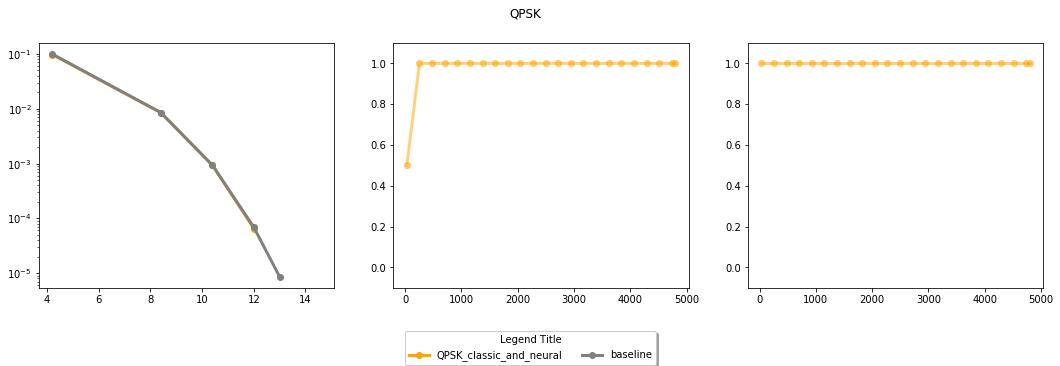

In [69]:
br = utils.util_lookup_table.BER_lookup_table()
color = {
 'QPSK_neural_vs_clone':"r",
 'QPSK_neural_vs_selfalien':'g',
 'QPSK_neural_vs_poly':'b',
 'QPSK_classic_and_neural':"orange",
 'QPSK_poly_vs_clone':"blue",
}
fig,(ber, db3, db5) = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(6*3)
# for ax in axes:
#     ax.set_aspect('equal', adjustable="datalim")
# (ber, db3, db5) = axes
fig.suptitle('QPSK')
baseline=False

#     f = os.path.join("./results", experiment_name)
experiment_name = meta['experiment_name']
experiment_dict = process_experiment("./")
print(experiment_dict.keys())
mid_ber = sorted(experiment_dict.keys())[0]
r = experiment_dict[mid_ber]
print(r.keys())
#     print(r['test_SNR_dbs'], np.fliplr(np.array(r['BER_mid']).reshape((1, 6))))
ber.plot( np.fliplr(np.array(r['test_SNR_dbs']).reshape((1, 6)))[0], 
          np.fliplr(np.array(r['BER_mid']).reshape((1, 6)))[0],'o-b', 
          label=experiment_name, color = color[experiment_name], linewidth = 3)
db3.plot(r['symbols_sent'], r['3db_off'],'o-b',  label=experiment_name, color = color[experiment_name], linewidth = 3, alpha=.5)
db5.plot(r['symbols_sent'], r['5db_off'], 'o-b',label=experiment_name, color = color[experiment_name], linewidth = 3, alpha=.5)
if not baseline:
    ber_baseline = [br.get_optimal_BER_roundtrip(test_SNR_db, 2) 
                    for test_SNR_db in np.fliplr(np.array(r['test_SNR_dbs']).reshape((1, 6)))[0]]
    ber.plot( np.fliplr(np.array(r['test_SNR_dbs']).reshape((1, 6)))[0], 
          ber_baseline,'o-b',
          label="baseline", color ='gray', linewidth = 3)
    baseline=True
ber.set_aspect('equal')
ber.set_yscale('log')
# ber.legend()

db3.set_ylim(top=1.1, bottom=-0.1)
db5.set_ylim(top=1.1, bottom=-0.1)
# db5.set_aspect('equal')
handles, labels = ber.get_legend_handles_labels()



# Put a legend below current axis
fig.legend(handles,                # The line objects
           labels,
           borderaxespad=0.1,    # Small spacing around legend box
           title="Legend Title",  # Title for the legend
           loc='lower center',
           fancybox=True, shadow=True, ncol=5
           )
# fig.tight_layout()
fig.subplots_adjust(bottom=0.2)  
plt.show()